In [6]:
%matplotlib inline
import numpy as np
import pandas as pd
import datetime as dt
import pytz
import matplotlib.pyplot as plt
from kam11 import thermister, ctd

In [7]:
WHOIString = thermister.WHOI_TS()
CTD = ctd.CTD()

In [8]:
ssConverter = thermister.SoundSpeedFromTemp()
(zTest, salInterp) = ssConverter.getSalinityProfile()

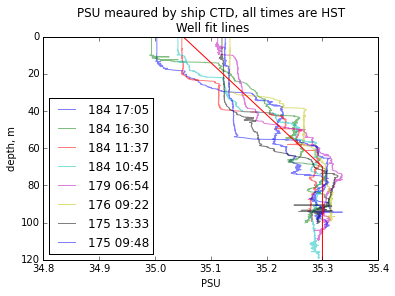

In [9]:
# Well fit ctds
dsFormat = '%j %H:%M'

for i in CTD.sal.columns:
    if CTD.sal.ix[0, i] >= 34.95:
        # set up datetime label
        loc_dt = CTD.castTimes[i].astimezone(pytz.timezone('US/Hawaii'))
        plt.plot(CTD.sal[i], CTD.sal.index, alpha=0.5,\
                label = loc_dt.strftime(dsFormat))
        
_ = plt.plot(salInterp, zTest, 'r')
_ = plt.ylim(120, 0)
_ = plt.xlim(34.8, 35.4)
_ = plt.legend(loc=3)
_ = plt.title('PSU meaured by ship CTD, all times are HST' +\
             '\n Well fit lines')
_ = plt.ylabel('depth, m')
_ = plt.xlabel('PSU')

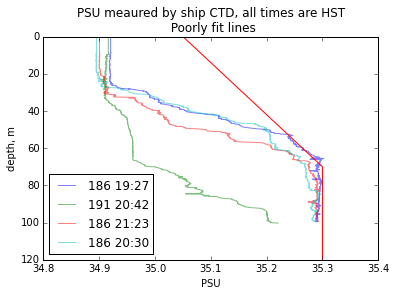

In [10]:
# Well fit ctds
dsFormat = '%j %H:%M'

for i in CTD.sal.columns:
    if CTD.sal.ix[0, i] < 34.95:
        # set up datetime label
        loc_dt = CTD.castTimes[i].astimezone(pytz.timezone('US/Hawaii'))
        plt.plot(CTD.sal[i], CTD.sal.index, alpha=0.5,\
                label = loc_dt.strftime(dsFormat))
        
_ = plt.plot(salInterp, zTest, 'r')
_ = plt.ylim(120, 0)
_ = plt.xlim(34.8, 35.4)

_ = plt.legend(loc=3)
_ = plt.title('PSU meaured by ship CTD, all times are HST'+\
             '\n Poorly fit lines')
_ = plt.ylabel('depth, m')
_ = plt.xlabel('PSU')